# Training Tests

In [26]:
%reload_ext autoreload

In [23]:
%load_ext autoreload

%autoreload 2

%matplotlib inline

### Setting up dataset

In [17]:
from kerasUtils import *
#train, test = splitDataSet("/home/alubitz/Downloads/balancedCleanedDataSet_5GB", 0.15, 42)

#train, test = splitDataSet("/media/al/bcaed2d1-c378-44e2-a581-fae772b468db/data/balancedCleanedDataSet_5GB", 0.15, 42) #small test set 1 to 1

train, test = splitDataSet("/media/al/0fd62943-862a-40b9-a4db-fe92a880b732/balancedCleandDataSet", 0.15, 42) # 1 to 1 Dataset

#train, test = splitDataSet("/media/al/bcaed2d1-c378-44e2-a581-fae772b468db/data/balancedCleandDataSet", 0.15, 42) # 2 to 1 Dataset

print('Loaded {} training samples and {} validation samples'.format(len(train), len(test)))


Using TensorFlow backend.


The following GPU devices are available: /device:GPU:0
Loaded 22244 positive samples and 22245 negative samples
Loaded 37817 training samples and 6672 validation samples


### Or put the whole data in memory

In [37]:
from kerasUtils import *
import datetime
batch_size = 64
imageSize = (96, 96)
grayscale = False
num_steps = 2 
one_hot = False
train_samples= 20000 
valid_samples= 3000
print_freq=None

(train_x, train_y), validation_data = genData(train, 
                                              test,train_samples=train_samples, 
                                              valid_samples= valid_samples, 
                                              batch_size = batch_size, 
                                              imageSize = imageSize,
                                              grayscale = grayscale, 
                                              num_steps=num_steps, 
                                              one_hot=one_hot,
                                              print_freq=print_freq, 
                                             )



 Training data: 100.00%	ETA: 0.05345290357741454sining data: 16.52%	ETA: 900.4728112032368sTraining data: 83.96%	ETA: 171.3345169548538s
 Validation data: 100.00%ETA: 916.7439129438419ss


# Timing for train directly

In [32]:
from kerasUtils import *
from plotUtils import *
import keras
input_shape = train_x[0].shape
print(input_shape)
epochs = 200
model, modelName = Models.buildTimedistributed('mobileNet', 
                                               input_shape=input_shape, 
                                               #lstm_dims = 128, 
                                               #num_lstm_layers= 4, 
                                               #num_dense_layers=0,
                                               #dense_dims=512
                                               )

history = model.fit(x=train_x, y=train_y, validation_data=validation_data, batch_size=batch_size, epochs=epochs)
num_samples = 'all' if not train_samples else train_samples
Models.saveHistory(history.history, "../trainingHistories/JUSTATEST{}_{}_{}_{}_{}.pickle".format(num_samples, modelName, batch_size, input_shape, datetime.datetime.now()))
visualizeHistory(history.history)

The following GPU devices are available: /device:GPU:0


[autoreload of kerasUtils failed: Traceback (most recent call last):
  File "/home/al/anaconda3/envs/MA/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/al/anaconda3/envs/MA/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/home/al/anaconda3/envs/MA/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/home/al/anaconda3/envs/MA/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/home/al/anaconda3/envs/MA/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/home/al/anaconda3/envs/MA/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update

(2, 96, 96, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_10 (TimeDis (None, 2, 9216)           3228864   
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                1183872   
_________________________________________________________________
batch_normalization_10 (Batc (None, 32)                128       
_________________________________________________________________
dense_19 (Dense)             (None, 512)               16896     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 513       
Total params: 4,430,273
Trainable params: 4,408,321
Non-trainable params: 21,952
_________________________________________________________________
Train on 1000 samples, validate on 120 samples
Epoch 1/50
1000/1000 [==============================] - 14s 14ms/

KeyboardInterrupt: 

# Timing for resize with Generator

(2, 64, 64, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_13 (TimeDis (None, 2, 4096)           3228864   
_________________________________________________________________
lstm_13 (LSTM)               (None, 32)                528512    
_________________________________________________________________
batch_normalization_13 (Batc (None, 32)                128       
_________________________________________________________________
dense_25 (Dense)             (None, 512)               16896     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 513       
Total params: 3,774,913
Trainable params: 3,752,961
Non-trainable params: 21,952
_________________________________________________________________
Epoch 1/200
312/312 [==============================] - 36s 115ms/step - loss: 0.6974 - acc: 0.5037 - val_loss: 0

312/312 [==============================] - 19s 62ms/step - loss: 0.0534 - acc: 0.9800 - val_loss: 1.6516 - val_acc: 0.6233
Epoch 52/200
312/312 [==============================] - 19s 62ms/step - loss: 0.0469 - acc: 0.9832 - val_loss: 1.8022 - val_acc: 0.6236
Epoch 53/200
312/312 [==============================] - 20s 63ms/step - loss: 0.0515 - acc: 0.9819 - val_loss: 1.7871 - val_acc: 0.6257
Epoch 54/200
312/312 [==============================] - 19s 62ms/step - loss: 0.0497 - acc: 0.9809 - val_loss: 1.6998 - val_acc: 0.6382
Epoch 55/200
312/312 [==============================] - 19s 62ms/step - loss: 0.0562 - acc: 0.9785 - val_loss: 1.6278 - val_acc: 0.6393
Epoch 56/200
312/312 [==============================] - 20s 66ms/step - loss: 0.0464 - acc: 0.9821 - val_loss: 1.7573 - val_acc: 0.6267
Epoch 57/200
312/312 [==============================] - 21s 66ms/step - loss: 0.0420 - acc: 0.9847 - val_loss: 1.7389 - val_acc: 0.6315
Epoch 58/200
312/312 [==============================] - 20s 6

312/312 [==============================] - 20s 65ms/step - loss: 9.7487e-05 - acc: 1.0000 - val_loss: 2.2047 - val_acc: 0.6464
Epoch 106/200
312/312 [==============================] - 20s 64ms/step - loss: 9.5454e-05 - acc: 1.0000 - val_loss: 2.2079 - val_acc: 0.6440
Epoch 107/200

312/312 [==============================] - 20s 64ms/step - loss: 9.3506e-05 - acc: 1.0000 - val_loss: 2.2074 - val_acc: 0.6461
Epoch 108/200
312/312 [==============================] - 20s 64ms/step - loss: 9.1637e-05 - acc: 1.0000 - val_loss: 2.2119 - val_acc: 0.6467
Epoch 109/200
312/312 [==============================] - 19s 62ms/step - loss: 8.9843e-05 - acc: 1.0000 - val_loss: 2.2235 - val_acc: 0.6437
Epoch 110/200
312/312 [==============================] - 20s 63ms/step - loss: 8.8118e-05 - acc: 1.0000 - val_loss: 2.2206 - val_acc: 0.6481
Epoch 111/200
312/312 [==============================] - 20s 64ms/step - loss: 8.6461e-05 - acc: 1.0000 - val_loss: 2.2229 - val_acc: 0.6491
Epoch 112/200
312/312 [===

312/312 [==============================] - 21s 66ms/step - loss: 4.4119e-05 - acc: 1.0000 - val_loss: 2.3649 - val_acc: 0.6450
Epoch 163/200
312/312 [==============================] - 20s 63ms/step - loss: 4.3698e-05 - acc: 1.0000 - val_loss: 2.3628 - val_acc: 0.6454
Epoch 164/200
312/312 [==============================] - 21s 66ms/step - loss: 4.3284e-05 - acc: 1.0000 - val_loss: 2.3693 - val_acc: 0.6444
Epoch 165/200
312/312 [==============================] - 20s 64ms/step - loss: 4.2879e-05 - acc: 1.0000 - val_loss: 2.3724 - val_acc: 0.6433
Epoch 166/200

312/312 [==============================] - 20s 65ms/step - loss: 4.2480e-05 - acc: 1.0000 - val_loss: 2.3689 - val_acc: 0.6474
Epoch 167/200
312/312 [==============================] - 20s 65ms/step - loss: 4.2089e-05 - acc: 1.0000 - val_loss: 2.3767 - val_acc: 0.6444
Epoch 168/200
312/312 [==============================] - 20s 65ms/step - loss: 4.1705e-05 - acc: 1.0000 - val_loss: 2.3712 - val_acc: 0.6474
Epoch 169/200
312/312 [===

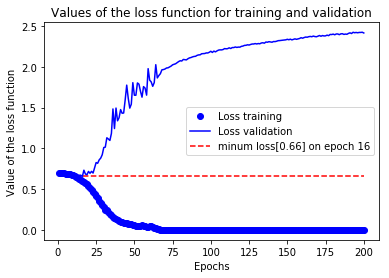

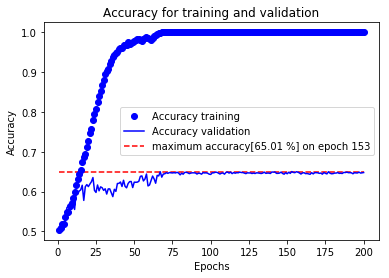

needed 4045.9565892219543s for resize and training


In [38]:
import time
start = time.time()
from kerasUtils import *
from plotUtils import *
import keras
training_generator = DataGeneratorRAM((train_x, train_y), imageSize = (64, 64), num_steps=num_steps, batch_size=64)
validation_generator = DataGeneratorRAM(validation_data, imageSize = (64, 64), num_steps=num_steps, batch_size=64)
input_shape = training_generator[0][0][0].shape
print(input_shape)
epochs = 200

model, modelName = Models.buildTimedistributed('mobileNet', 
                                               input_shape=input_shape, 
                                               #lstm_dims = 128, 
                                               #num_lstm_layers= 4, 
                                               #num_dense_layers=0,
                                               #dense_dims=512
                                               )

history = model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    workers=max([multiprocessing.cpu_count() - 5, 10]), epochs=epochs)
num_samples = 'all' if not train_samples else train_samples
Models.saveHistory(history.history, "../trainingHistories/JUSTATEST{}_{}_{}_{}_{}.pickle".format(num_samples, modelName, batch_size, input_shape, datetime.datetime.now()))
visualizeHistory(history.history)
print("needed {}s for resize and training".format(time.time()-start))

# Timing with reshape with genDataInternal

Training data: 0.00%	ETA: Nones
Training data: 0.50%	ETA: 2.5313963890075675s
Training data: 1.00%	ETA: 2.5437898635864276s
Training data: 1.50%	ETA: 2.503324985504151s
Training data: 2.00%	ETA: 2.4673578739166278s
Training data: 2.50%	ETA: 2.442390918731689s
Training data: 3.00%	ETA: 2.422095298767088s
Training data: 3.50%	ETA: 2.413107395172117s
Training data: 4.00%	ETA: 2.4005870819091757s
Training data: 4.50%	ETA: 2.391329235500754s
Training data: 5.00%	ETA: 2.3834710121154754s
Training data: 5.50%	ETA: 2.36576979810541s
Training data: 6.00%	ETA: 2.360650618871049s
Training data: 6.50%	ETA: 2.424451681283803s
Training data: 7.00%	ETA: 2.415271690913608s
Training data: 7.50%	ETA: 2.4021880626678476s
Training data: 8.00%	ETA: 2.4264420270919804s
Training data: 8.50%	ETA: 2.413054494296807s
Training data: 9.00%	ETA: 2.3970274925231956s
Training data: 9.50%	ETA: 2.3773498786123173s
Training data: 10.00%	ETA: 2.3571188449859624s
Training data: 10.50%	ETA: 2.3381041458674847s
Training da

Training data: 94.00%	ETA: 0.1567584149380951s
Training data: 94.50%	ETA: 0.1437200932275685s
Training data: 95.00%	ETA: 0.1306442461515731s
Training data: 95.50%	ETA: 0.11760432183430493s
Training data: 96.00%	ETA: 0.10457797845204718s
Training data: 96.50%	ETA: 0.09152306917417902s
Training data: 97.00%	ETA: 0.07844637349708838s
Training data: 97.50%	ETA: 0.06536142031351766s
Training data: 98.00%	ETA: 0.05227365785715563s
Training data: 98.50%	ETA: 0.0391923219419375s
Training data: 99.00%	ETA: 0.026121746410023235s
Training data: 99.50%	ETA: 0.013058138852143472s
 Training data: 100.00%
Validation data: 0.00%	ETA: Nones
Validation data: 3.33%	ETA: 2.5855314731597883s
Validation data: 6.67%	ETA: 2.5485577583312984s
Validation data: 10.00%	ETA: 2.5207659403483076s
Validation data: 13.33%	ETA: 2.5557010173797594s
Validation data: 16.67%	ETA: 2.5518879890441917s
Validation data: 20.00%	ETA: 2.5275526046752947s
Validation data: 23.33%	ETA: 2.5027244772229893s
Validation data: 26.67%	ETA

Epoch 37/200
20000/20000 [==============================] - 19s 951us/step - loss: 0.2972 - acc: 0.8696 - val_loss: 1.0325 - val_acc: 0.5947
Epoch 38/200
20000/20000 [==============================] - 19s 954us/step - loss: 0.2709 - acc: 0.8845 - val_loss: 1.3342 - val_acc: 0.5860
Epoch 39/200
20000/20000 [==============================] - 19s 954us/step - loss: 0.2640 - acc: 0.8881 - val_loss: 0.9998 - val_acc: 0.6353
Epoch 40/200
20000/20000 [==============================] - 19s 953us/step - loss: 0.2427 - acc: 0.9007 - val_loss: 1.0376 - val_acc: 0.6100
Epoch 41/200
20000/20000 [==============================] - 19s 954us/step - loss: 0.2253 - acc: 0.9067 - val_loss: 1.0775 - val_acc: 0.6020
Epoch 42/200
20000/20000 [==============================] - 19s 953us/step - loss: 0.2157 - acc: 0.9123 - val_loss: 1.0985 - val_acc: 0.6193
Epoch 43/200
20000/20000 [==============================] - 19s 952us/step - loss: 0.1994 - acc: 0.9207 - val_loss: 1.0844 - val_acc: 0.6397
Epoch 44/200


20000/20000 [==============================] - 19s 963us/step - loss: 0.0330 - acc: 0.9882 - val_loss: 1.8814 - val_acc: 0.6467
Epoch 96/200
20000/20000 [==============================] - 19s 946us/step - loss: 0.0353 - acc: 0.9874 - val_loss: 1.7546 - val_acc: 0.6550
Epoch 97/200
20000/20000 [==============================] - 19s 955us/step - loss: 0.0357 - acc: 0.9869 - val_loss: 1.7293 - val_acc: 0.6503
Epoch 98/200
20000/20000 [==============================] - 19s 948us/step - loss: 0.0309 - acc: 0.9897 - val_loss: 1.7094 - val_acc: 0.6543
Epoch 99/200
20000/20000 [==============================] - 19s 952us/step - loss: 0.0380 - acc: 0.9855 - val_loss: 1.9826 - val_acc: 0.6327
Epoch 100/200
20000/20000 [==============================] - 19s 969us/step - loss: 0.0349 - acc: 0.9881 - val_loss: 1.7233 - val_acc: 0.6570
Epoch 101/200
20000/20000 [==============================] - 19s 953us/step - loss: 0.0296 - acc: 0.9893 - val_loss: 1.6783 - val_acc: 0.6463
Epoch 102/200
20000/2000

Epoch 153/200
20000/20000 [==============================] - 19s 956us/step - loss: 0.0193 - acc: 0.9946 - val_loss: 1.8465 - val_acc: 0.6597
Epoch 154/200
20000/20000 [==============================] - 19s 963us/step - loss: 0.0087 - acc: 0.9972 - val_loss: 1.9344 - val_acc: 0.6597
Epoch 155/200
20000/20000 [==============================] - 19s 954us/step - loss: 0.0105 - acc: 0.9960 - val_loss: 1.9706 - val_acc: 0.6567
Epoch 156/200
20000/20000 [==============================] - 19s 953us/step - loss: 0.0127 - acc: 0.9951 - val_loss: 1.9210 - val_acc: 0.6597
Epoch 157/200
20000/20000 [==============================] - 19s 956us/step - loss: 0.0165 - acc: 0.9941 - val_loss: 2.0300 - val_acc: 0.6420
Epoch 158/200
20000/20000 [==============================] - 19s 955us/step - loss: 0.0127 - acc: 0.9958 - val_loss: 1.8963 - val_acc: 0.6680
Epoch 159/200
20000/20000 [==============================] - 19s 951us/step - loss: 0.0131 - acc: 0.9955 - val_loss: 1.8650 - val_acc: 0.6580
Epoch 

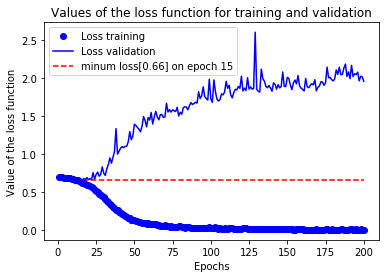

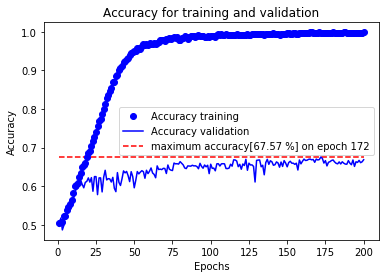

needed 3860.382967710495s for resize and training


In [39]:
import time
start = time.time()
from kerasUtils import *
from plotUtils import *
image_size = 64
(train_x_resized, train_y_resized), validation_data_resized = genDataInternal((train_x, train_y), 
                                            validation_data,train_samples=train_samples, 
                                            valid_samples= None, 
                                            batch_size = None, 
                                            imageSize = (image_size, image_size),
                                            grayscale = grayscale, 
                                            num_steps=num_steps, 
                                            one_hot=one_hot,
                                            print_freq=100
                                            )
input_shape = train_x_resized[0].shape
print(input_shape)
epochs = 200
model, modelName = Models.buildTimedistributed('mobileNet', 
                                               input_shape=input_shape, 
                                               #lstm_dims = 128, 
                                               #num_lstm_layers= 4, 
                                               #num_dense_layers=0,
                                               #dense_dims=512
                                               )

history = model.fit(x=train_x_resized, y=train_y_resized, validation_data=validation_data_resized, batch_size=batch_size, epochs=epochs)
num_samples = 'all' if not train_samples else train_samples
Models.saveHistory(history.history, "../trainingHistories/JUSTATEST{}_{}_{}_{}_{}.pickle".format(num_samples, modelName, batch_size, input_shape, datetime.datetime.now()))
visualizeHistory(history.history)
print("needed {}s for resize and training".format(time.time()-start))